In [1]:
from keras.layers import Input, Dense
from keras.models import Model

# this is the size of our encoded representations
encoding_dim = 32  # 32 floats -> compression of factor 24.5, assuming the input is 784 floats

# this is our input placeholder
input_img = Input(shape=(784,))
# "encoded" is the encoded representation of the input
encoded = Dense(encoding_dim, activation='relu')(input_img)
# "decoded" is the lossy reconstruction of the input
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img, decoded)

c:\users\nachiket\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# this model maps an input to its encoded representation
encoder = Model(input_img, encoded)

In [3]:
# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))
# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
# create the decoder model
decoder = Model(encoded_input, decoder_layer(encoded_input))

In [4]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

In [5]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

In [6]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [7]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 [==============================] - 25s 414us/step - loss: 0.3704 - val_loss: 0.2707
Epoch 2/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.2627 - val_loss: 0.2510
Epoch 3/50
60000/60000 [==============================] - 5s 82us/step - loss: 0.2406 - val_loss: 0.2287
Epoch 4/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.2214 - val_loss: 0.2117
Epoch 5/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.2071 - val_loss: 0.1999
Epoch 6/50
60000/60000 [==============================] - 5s 87us/step - loss: 0.1968 - val_loss: 0.1907
Epoch 7/50
60000/60000 [==============================] - 5s 83us/step - loss: 0.1883 - val_loss: 0.1829
Epoch 8/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.1811 - val_loss: 0.1765
Epoch 9/50
60000/60000 [==============================] - 5s 81us/step - loss: 0.1753 - val_loss: 0.1713
Epo

In [8]:
# encode and decode some digits
# note that we take them from the *test* set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

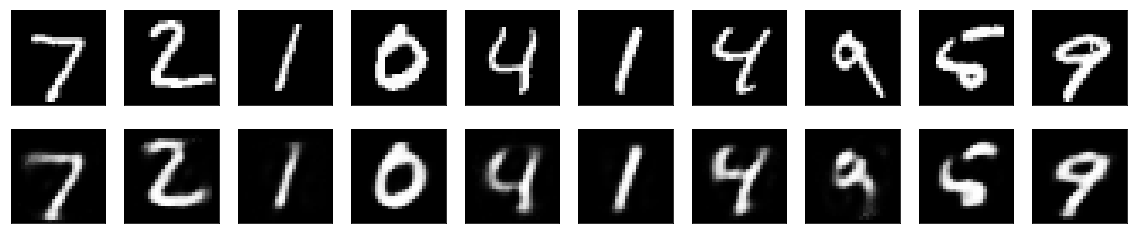

In [9]:
# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
from keras import regularizers

encoding_dim = 32

input_img = Input(shape=(784,))
# add a Dense layer with a L1 activity regularizer
encoded = Dense(encoding_dim, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

In [11]:
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [12]:
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

autoencoder.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 9s 147us/step - loss: 0.3359 - val_loss: 0.2625
Epoch 2/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.2574 - val_loss: 0.2525
Epoch 3/100
60000/60000 [==============================] - 7s 119us/step - loss: 0.2439 - val_loss: 0.2340
Epoch 4/100
60000/60000 [==============================] - 7s 121us/step - loss: 0.2211 - val_loss: 0.2111
Epoch 5/100
60000/60000 [==============================] - 8s 126us/step - loss: 0.2011 - val_loss: 0.1908
Epoch 6/100
60000/60000 [==============================] - 7s 117us/step - loss: 0.1891 - val_loss: 0.1842
Epoch 7/100
60000/60000 [==============================] - 7s 124us/step - loss: 0.1812 - val_loss: 0.1771
Epoch 8/100
60000/60000 [==============================] - 7s 116us/step - loss: 0.1743 - val_loss: 0.1689
Epoch 9/100
60000/60000 [==============================] - 8s 128us/step - loss: 0.1679 - val_

KeyboardInterrupt: 

W-Net implementation


In [1]:
from keras.layers import Input, Dense
from keras.models import Model

c:\users\nachiket\appdata\local\programs\python\python35\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
